<a href="https://colab.research.google.com/github/jacobpad/Labs-Stuff/blob/master/Elon_Musk_twitter_followers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""FOR USE IN COLAB"""
# !pip install squarify
# !python -m spacy download en_core_web_lg

'FOR USE IN COLAB'

In [2]:
# Base
from collections import Counter
import re
import string
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# Establish the English core web
nlp = spacy.load("en_core_web_lg")


In [3]:
# Establish the URL
url = 'https://raw.githubusercontent.com/jacobpad/Labs-Stuff/master/elonmusk_followers_english_only.json'

# Read in data
df = pd.read_json(url, orient='index')
df = df.reset_index()
df = df.rename(columns={'index':'date_time', 0:'tweet'})

# View
df

,date_time,tweet
0,2009-12-09 17:53:34.369775616,This kid will forever be a legend 😂 https://t....
1,2009-12-01 11:19:37.461444609,"If you truly believe Lebrons mindset, competit..."
2,2009-11-26 03:37:33.637013507,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!
3,2009-12-21 06:38:15.388917763,@Bhuvan_Bam ❤️❤️
4,2009-09-04 21:32:08.857378816,I'm not crying you're crying.\nhttps://t.co/Bc...
...,...,...
9941,2009-12-13 04:08:20.573491200,@MirandaSleeper The offerings in that f-3 are ...
9942,2009-12-18 09:53:57.627150336,This will be the defining segment of “The Last...
9943,2009-12-20 14:22:19.864375297,"@frank_miskelly I don’t like it, I LOVE IT! Bu..."
9944,2009-12-20 11:50:26.459676672,Excited for my brother @Shufly10 as he embarks...


In [4]:
# Apply a first round of text cleaning techniques
'''
# def clean_text_round1(text):
#     """
#     Make text lowercase, remove text in square brackets, remove punctuation 
#     and remove words containing numbers.
#     """
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = re.sub('\n', '', text)
#     return text

# round1 = lambda x: clean_text_round1(x)

# Let's take a look at the updated text
# df['data_clean'] = pd.DataFrame(df['tweet'].apply(round1))
# df
'''

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens


In [5]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Apply tokenizer
df['tokens'] = df['tweet'].apply(tokenize)

# View
print(df)

                         date_time  \
0    2009-12-09 17:53:34.369775616   
1    2009-12-01 11:19:37.461444609   
2    2009-11-26 03:37:33.637013507   
3    2009-12-21 06:38:15.388917763   
4    2009-09-04 21:32:08.857378816   
...                            ...   
9941 2009-12-13 04:08:20.573491200   
9942 2009-12-18 09:53:57.627150336   
9943 2009-12-20 14:22:19.864375297   
9944 2009-12-20 11:50:26.459676672   
9945 2009-12-20 04:55:37.291964416   

                                                  tweet  \
0     This kid will forever be a legend 😂 https://t....   
1     If you truly believe Lebrons mindset, competit...   
2       BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!   
3                                      @Bhuvan_Bam ❤️❤️   
4     I'm not crying you're crying.\nhttps://t.co/Bc...   
...                                                 ...   
9941  @MirandaSleeper The offerings in that f-3 are ...   
9942  This will be the defining segment of “The Last...   
9943  @frank

In [6]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens_count'] = df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 6928),
 ('to', 5415),
 ('a', 3943),
 ('and', 3517),
 ('of', 3154),
 ('is', 2759),
 ('in', 2722),
 ('you', 2355),
 ('for', 2163),
 ('i', 2107)]

In [7]:
# Count Function to count tokens
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [8]:
word_count_df = count(df['tokens'])
word_count_df

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
34,the,4112,6928,1.0,0.033863,0.033863,0.413433
21,to,3605,5415,2.0,0.026468,0.060331,0.362457
7,a,2872,3943,3.0,0.019273,0.079604,0.288759
128,and,2676,3517,4.0,0.017191,0.096795,0.269053
218,of,2374,3154,5.0,0.015416,0.112211,0.238689
...,...,...,...,...,...,...,...
34087,bigtime,1,1,34090.0,0.000005,0.999980,0.000101
34092,magee,1,1,34091.0,0.000005,0.999985,0.000101
34093,tpw,1,1,34092.0,0.000005,0.999990,0.000101
34091,atd,1,1,34093.0,0.000005,0.999995,0.000101


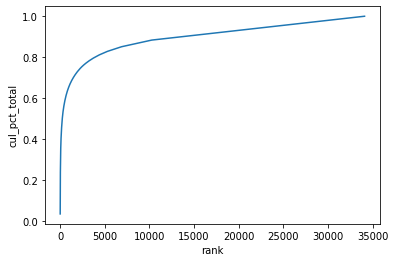

In [9]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=word_count_df);

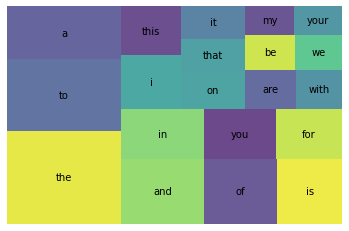

In [10]:
wc_top20 = word_count_df[word_count_df['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [11]:
df

,date_time,tweet,tokens,tokens_count
0,2009-12-09 17:53:34.369775616,This kid will forever be a legend 😂 https://t....,"[this, kid, will, forever, be, a, legend, http...",None
1,2009-12-01 11:19:37.461444609,"If you truly believe Lebrons mindset, competit...","[if, you, truly, believe, lebrons, mindset, co...",None
2,2009-11-26 03:37:33.637013507,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,"[buttlicker, our, prices, have, never, been, l...",None
3,2009-12-21 06:38:15.388917763,@Bhuvan_Bam ❤️❤️,[bhuvanbam],None
4,2009-09-04 21:32:08.857378816,I'm not crying you're crying.\nhttps://t.co/Bc...,"[im, not, crying, youre, cryinghttpstcobcfz6f0...",None
...,...,...,...,...
9941,2009-12-13 04:08:20.573491200,@MirandaSleeper The offerings in that f-3 are ...,"[mirandasleeper, the, offerings, in, that, f3,...",None
9942,2009-12-18 09:53:57.627150336,This will be the defining segment of “The Last...,"[this, will, be, the, defining, segment, of, t...",None
9943,2009-12-20 14:22:19.864375297,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","[frankmiskelly, i, dont, like, it, i, love, it...",None
9944,2009-12-20 11:50:26.459676672,Excited for my brother @Shufly10 as he embarks...,"[excited, for, my, brother, shufly10, as, he, ...",None


In [12]:
# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(['hi','\n','\n\n', '&amp;', 'la',' ',
                                            'que', 'de', 'o', 'y', 'en', 'para',
                                            '.', 'el', 'un', 'los', 'le', 'por', 
                                            'un', 'el'])



In [13]:
tokens = []

for doc in tokenizer.pipe(df['tweet'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head(20)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
157,like,599,628,1.0,0.004924,0.004924,0.060225
535,-,333,582,2.0,0.004564,0.009488,0.033481
651,people,482,533,3.0,0.004179,0.013667,0.048462
709,new,323,352,4.0,0.002760,0.016428,0.032475
172,time,317,331,5.0,0.002595,0.019023,0.031872
57,know,274,296,6.0,0.002321,0.021344,0.027549
106,don’t,246,274,7.0,0.002149,0.023493,0.024734
175,think,261,272,8.0,0.002133,0.025626,0.026242
399,it’s,243,266,9.0,0.002086,0.027711,0.024432
438,want,244,263,10.0,0.002062,0.029774,0.024532


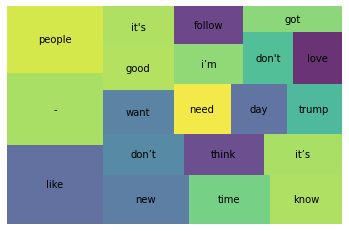

In [14]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()


In [15]:
wcdf = wc.head(20)
wcdf['top_words'] = wcdf['word'].to_list()
wcdf

/Users/jacobpadgett/opt/anaconda3/envs/elon-tweets/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,top_words
157,like,599,628,1.0,0.004924,0.004924,0.060225,like
535,-,333,582,2.0,0.004564,0.009488,0.033481,-
651,people,482,533,3.0,0.004179,0.013667,0.048462,people
709,new,323,352,4.0,0.002760,0.016428,0.032475,new
172,time,317,331,5.0,0.002595,0.019023,0.031872,time
57,know,274,296,6.0,0.002321,0.021344,0.027549,know
106,don’t,246,274,7.0,0.002149,0.023493,0.024734,don’t
175,think,261,272,8.0,0.002133,0.025626,0.026242,think
399,it’s,243,266,9.0,0.002086,0.027711,0.024432,it’s
438,want,244,263,10.0,0.002062,0.029774,0.024532,want


In [16]:
# Imports
import requests
import json

# Get the JSON
url = 'https://raw.githubusercontent.com/jacobpad/Labs-Stuff/master/elonmusk_followers_english_only.json'
r = requests.get(url)
df = r.json()

# Simple ormating to work with the JSON
df = pd.DataFrame(df.values())
col = ['original_tweet']
df = df.rename(columns={0:'original_tweet'})

# View it
df

,original_tweet
0,This kid will forever be a legend 😂 https://t....
1,"If you truly believe Lebrons mindset, competit..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!
3,@Bhuvan_Bam ❤️❤️
4,I'm not crying you're crying.\nhttps://t.co/Bc...
...,...
9941,@MirandaSleeper The offerings in that f-3 are ...
9942,This will be the defining segment of “The Last...
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu..."
9944,Excited for my brother @Shufly10 as he embarks...


In [17]:
# Make emoji free text
# Source: https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

import emoji
def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text


# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
df['emoji_free_tweet'] = df['original_tweet'].apply(call_emoji_free)
df

,original_tweet,emoji_free_tweet
0,This kid will forever be a legend 😂 https://t....,This kid will forever be a legend https://t.co...
1,"If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!
3,@Bhuvan_Bam ❤️❤️,@Bhuvan_Bam
4,I'm not crying you're crying.\nhttps://t.co/Bc...,I'm not crying you're crying. https://t.co/BcF...
...,...,...
9941,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...
9942,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu..."
9944,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...


In [18]:
# Removing url's
def remove_url(text):
    """
    Remove URL's
    Accepts:
        emoji_free_tweet
    Returns:
        emoji_free_tweet & url_free_tweet
    Makes a new column
    """
    # https://www.youtube.com/watch?v=O2onA4r5UaY
    pattern = r"http\S+"
    tokens = re.sub(pattern, "", text)
    return tokens

# Make new url_free_tweet column by applying the function on emoji_free_tweet
df['url_free_tweet'] = df['emoji_free_tweet'].apply(remove_url)

# View
df

,original_tweet,emoji_free_tweet,url_free_tweet
0,This kid will forever be a legend 😂 https://t....,This kid will forever be a legend https://t.co...,This kid will forever be a legend
1,"If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!
3,@Bhuvan_Bam ❤️❤️,@Bhuvan_Bam,@Bhuvan_Bam
4,I'm not crying you're crying.\nhttps://t.co/Bc...,I'm not crying you're crying. https://t.co/BcF...,I'm not crying you're crying.
...,...,...,...
9941,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...
9942,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu..."
9944,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...


In [19]:
# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(['hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want'])

tokens = []

for doc in tokenizer.pipe(df['url_free_tweet'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head(20)
tokens = []

for doc in tokenizer.pipe(df['url_free_tweet'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
137,like,599,628,1.0,0.005413,0.005413,0.060225
579,people,482,533,2.0,0.004594,0.010007,0.048462
630,new,323,352,3.0,0.003034,0.013041,0.032475
151,time,317,331,4.0,0.002853,0.015893,0.031872
47,know,274,296,5.0,0.002551,0.018445,0.027549
89,don’t,246,274,6.0,0.002362,0.020806,0.024734
154,think,261,272,7.0,0.002344,0.023151,0.026242
185,good,239,250,8.0,0.002155,0.025305,0.024030
176,need,224,240,9.0,0.002069,0.027374,0.022522
90,day,224,236,10.0,0.002034,0.029408,0.022522


In [20]:
df

,original_tweet,emoji_free_tweet,url_free_tweet,tokens
0,This kid will forever be a legend 😂 https://t....,This kid will forever be a legend https://t.co...,This kid will forever be a legend,"[kid, forever, legend]"
1,"If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","[truly, believe, lebrons, mindset,, competitiv..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,"[buttlicker!, prices, lower!!!]"
3,@Bhuvan_Bam ❤️❤️,@Bhuvan_Bam,@Bhuvan_Bam,[@bhuvan_bam]
4,I'm not crying you're crying.\nhttps://t.co/Bc...,I'm not crying you're crying. https://t.co/BcF...,I'm not crying you're crying.,"[crying, you're, crying.]"
...,...,...,...,...
9941,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,"[@mirandasleeper, offerings, f-3, closed, prev..."
9942,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,"[defining, segment, “the, dance.”]"
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","[@frank_miskelly, don’t, like, it,, love, it!,..."
9944,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,"[excited, brother, @shufly10, embarks, new, jo..."


In [21]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens_count'] = df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('like', 628),
 ('people', 533),
 ('new', 352),
 ('time', 331),
 ('know', 296),
 ('don’t', 274),
 ('think', 272),
 ('good', 250),
 ('need', 240),
 ('day', 236)]

In [22]:
# Make the word counts a dataframe
wc = pd.DataFrame.from_dict(word_counts, orient='index')
wc = wc.reset_index()
wc = wc.rename(columns={'index':'word', 0:'count'})
wc[:100]

,word,count
0,kid,12
1,forever,16
2,legend,8
3,truly,23
4,believe,77
...,...,...
95,coronavirus......,1
96,reality?,2
97,gloves?,1
98,mask?,1


In [23]:
# Make function to further edit words/tokens
def tokenize_further(text):
    df['tokens2'] = df['tokens'].apply(lambda x: x.strip(','))


In [24]:
wc_word_list = wc['word'].tolist()
wc_word_list

['kid',
 'forever',
 'legend',
 'truly',
 'believe',
 'lebrons',
 'mindset,',
 'competitive',
 'fire,',
 'intensity,',
 'drive',
 'win,',
 'love',
 'game',
 'match',
 'jordan’s',
 'longer',
 'value',
 'opinion',
 'real',
 'life.',
 'buttlicker!',
 'prices',
 'lower!!!',
 '@bhuvan_bam',
 'crying',
 "you're",
 'crying.',
 'vintage',
 'images',
 'reimagined',
 '@k_koi',
 'close',
 'life',
 'falling',
 'apart',
 '4',
 'million',
 'subs',
 'customs',
 'tonight?',
 'yay',
 'nay',
 'country',
 'club',
 'foxy',
 'know',
 'gang',
 'life?',
 '@stephen_kcco',
 '@thepodpmi',
 '@shahkgang',
 '@evanfoxy',
 "what's",
 'xbox',
 'gt?',
 '@zitosarmy',
 '@reaper6698',
 'purple',
 'it!',
 '#shahkgang',
 'aht',
 'blood!',
 "you'll",
 'late',
 'shot',
 'mike',
 'tyson',
 'working.',
 'evander',
 'holyfield’s',
 'gym,',
 'too?',
 '(via',
 '@holyfield)',
 'rand',
 'paul',
 'tried',
 'play',
 'doctor',
 'tv,',
 'dr.',
 'fauci',
 'schooling',
 'exposing',
 'fool',
 'is.',
 'don’t',
 'judge',
 'day',
 'harvest',

In [25]:
STOP, DONT RUN BELOW THIS POINT...

SyntaxError: invalid syntax (<ipython-input-25-d5c75c7e1d1c>, line 1)

In [ ]:

--------
# Count Function to count tokens
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')
--------
word_count_df = count(df['tokens'])
word_count_df
--------
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=word_count_df);
--------
wc_top20 = word_count_df[word_count_df['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

--------
--------
--------
